In [6]:
%matplotlib inline

import os
import glob
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import piff
from piff import Star
import fitsio
from piff.des.decaminfo import DECamInfo
dinfo = DECamInfo()

from esutil.htm import HTM
hmat = HTM()



In [2]:
outfile='/u/ec/roodman/kipacdisk/Piff/y1_500_i_shape_mode_round2.fits'
af = fitsio.FITS(outfile)
print(af['psf_stars'])

# plot variables for train stars
t = af['psf_stars'].read()


  file: /u/ec/roodman/kipacdisk/Piff/y1_500_i_shape_mode_round2.fits
  extension: 1
  type: BINARY_TBL
  extname: psf_stars
  rows: 6526397
  column info:
    x                   f8  
    y                   f8  
    u                   f8  
    v                   f8  
    chipnum             f8  
    ra                  f8  
    dec                 f8  
    e0                  f8  
    e1                  f8  
    e2                  f8  
    se0                 f8  
    se1                 f8  
    se2                 f8  
    fov_x               f8  
    fov_y               f8  
    pix_area            f8  
    atmo_size           f8  
    atmo_g1             f8  
    atmo_g2             f8  
    optics_L0           f8  
    optics_size         f8  
    optics_g1           f8  
    optics_g2           f8  
    model_e0            f8  
    model_e1            f8  
    model_e2            f8  


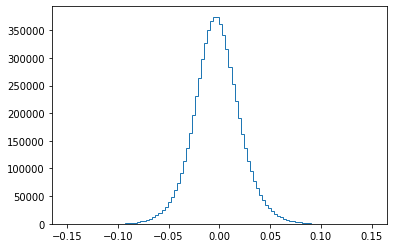

In [9]:
# is <atmo_size> dependent on optics_size ?
f,ax = plt.subplots(1,1)

h = ax.hist(t['atmo_size'],bins=100,range=(-0.15,0.15),histtype='step')

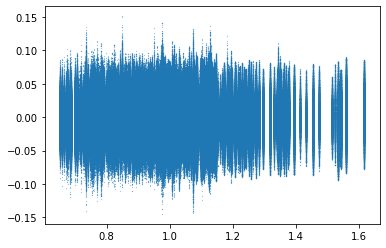

In [10]:
# is <atmo_size> dependent on optics_size ?
f,ax = plt.subplots(1,1)

h = ax.scatter(t['optics_size'],t['atmo_size'],marker='.',s=0.1)

Mean atmo_size bin1 =  -0.004263569463108778  +-  2.010354092353473e-05
Mean atmo_size bin2 =  -0.002563587986461902  +-  1.35994768226969e-05
Mean atmo_size bin3 =  -0.0022617732196349334  +-  1.7330753288739005e-05
Mean atmo_size bin4 =  -0.002003114956071439  +-  3.205828299635585e-05


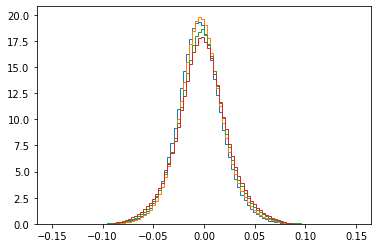

In [23]:
# is <atmo_size> dependent on optics_size ?
f,ax = plt.subplots(1,1)

bin1 = (t['optics_size'] < 0.8)
bin2 = (t['optics_size'] > 0.8) & (t['optics_size'] < 1.0)
bin3 = (t['optics_size'] > 1.0) & (t['optics_size'] < 1.2)
bin4 = (t['optics_size'] > 1.2) 

t_b1 = t[bin1]
t_b2 = t[bin2]
t_b3 = t[bin3]
t_b4 = t[bin4]

h = ax.hist(t_b1['atmo_size'],bins=100,range=(-0.15,0.15),histtype='step',density=True)
h = ax.hist(t_b2['atmo_size'],bins=100,range=(-0.15,0.15),histtype='step',density=True)
h = ax.hist(t_b3['atmo_size'],bins=100,range=(-0.15,0.15),histtype='step',density=True)
h = ax.hist(t_b4['atmo_size'],bins=100,range=(-0.15,0.15),histtype='step',density=True)

print("Mean atmo_size bin1 = ",np.mean(t_b1['atmo_size']),' +- ',np.std(t_b1['atmo_size'])/np.sqrt(len(t_b1['atmo_size'])))
print("Mean atmo_size bin2 = ",np.mean(t_b2['atmo_size']),' +- ',np.std(t_b2['atmo_size'])/np.sqrt(len(t_b2['atmo_size'])))
print("Mean atmo_size bin3 = ",np.mean(t_b3['atmo_size']),' +- ',np.std(t_b3['atmo_size'])/np.sqrt(len(t_b3['atmo_size'])))
print("Mean atmo_size bin4 = ",np.mean(t_b4['atmo_size']),' +- ',np.std(t_b4['atmo_size'])/np.sqrt(len(t_b4['atmo_size'])))

In [14]:
# now try with atmo_size_2
atmo_size_2 = t['atmo_size']*t['atmo_size'] + 2.0*t['optics_size']*t['atmo_size']

Mean atmo_size_2 bin1 =  -0.005778144089565545  +-  2.9674043065183026e-05
Mean atmo_size_2 bin2 =  -0.004149697995024417  +-  2.4870546080552102e-05
Mean atmo_size_2 bin3 =  -0.004260406829915948  +-  3.751461390842071e-05
Mean atmo_size_2 bin4 =  -0.004618638121742848  +-  8.66659593743762e-05


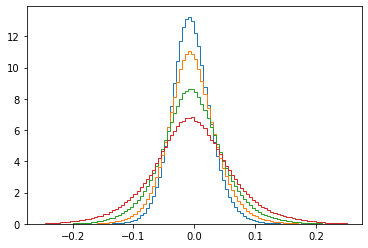

In [25]:
# is <atmo_size> dependent on optics_size ?
f,ax = plt.subplots(1,1)

atmo_size_2_b1 = atmo_size_2[bin1]
atmo_size_2_b2 = atmo_size_2[bin2]
atmo_size_2_b3 = atmo_size_2[bin3]
atmo_size_2_b4 = atmo_size_2[bin4]

h = ax.hist(atmo_size_2_b1,bins=100,range=(-0.25,0.25),histtype='step',density=True)
h = ax.hist(atmo_size_2_b2,bins=100,range=(-0.25,0.25),histtype='step',density=True)
h = ax.hist(atmo_size_2_b3,bins=100,range=(-0.25,0.25),histtype='step',density=True)
h = ax.hist(atmo_size_2_b4,bins=100,range=(-0.25,0.25),histtype='step',density=True)


print("Mean atmo_size_2 bin1 = ",np.mean(atmo_size_2_b1),' +- ',np.std(atmo_size_2_b1)/np.sqrt(len(atmo_size_2_b1)))
print("Mean atmo_size_2 bin2 = ",np.mean(atmo_size_2_b2),' +- ',np.std(atmo_size_2_b2)/np.sqrt(len(atmo_size_2_b2)))
print("Mean atmo_size_2 bin3 = ",np.mean(atmo_size_2_b3),' +- ',np.std(atmo_size_2_b3)/np.sqrt(len(atmo_size_2_b3)))
print("Mean atmo_size_2 bin4 = ",np.mean(atmo_size_2_b4),' +- ',np.std(atmo_size_2_b4)/np.sqrt(len(atmo_size_2_b4)))

In [42]:
def mkProfile(xarr,yarr,nx=100,xmin=0.,xmax=1.0,ymin=0.,ymax=1.0,retPlot=True):

    dx = (xmax-xmin)/nx
    bins = np.arange(xmin,xmax,dx)
    ind = np.digitize(xarr,bins)
    xval = []
    xerr = []
    yval = []
    yerr = []
    for i in range(len(bins)-1):

        here = (ind==i)
        ygood = np.logical_and(yarr>=ymin,yarr<=ymax)
        ok = np.logical_and(ygood,here)
        yinthisbin = yarr[ok]
        yhere = np.array(yinthisbin)
        n = len(yinthisbin)
        if n>0:
            xval.append(0.5*(bins[i+1]+bins[i]))
            xerr.append(0.5*(bins[i+1]-bins[i]))
            yval.append(yhere.mean())
            yerr.append(yhere.std()/n)
        #print i,bins[i],bins[i+1],len(yarr),yarr.mean(),n,yarr.std()

    if retPlot:
        profile = plt.errorbar(xval,yval,xerr=xerr,yerr=yerr)
        return profile
    else:
        return np.array(xval),np.array(yval),np.array(xerr),np.array(yerr)


<ErrorbarContainer object of 3 artists>

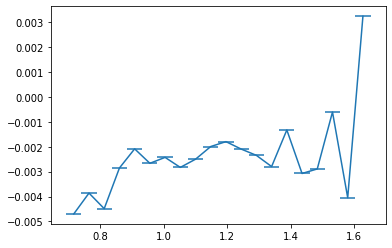

In [30]:
mkProfile(t['optics_size'],t['atmo_size'],xmin=0.5,xmax=1.7,ymin=-0.3,ymax=0.3,nx=25)

<ErrorbarContainer object of 3 artists>

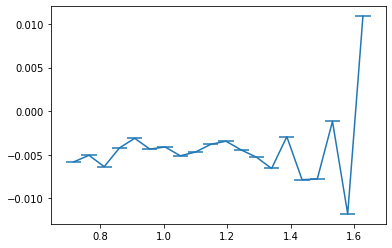

In [32]:
mkProfile(t['optics_size'],atmo_size_2,xmin=0.5,xmax=1.7,ymin=-0.5,ymax=0.5,nx=25)

Currently we define size as $s_{Total} = s_{optics} + s_{atmo}$ but I argue we should add sizes in quadrature, as $s_{Total} = \sqrt{s^2_{optics} + s^2_{atmo'}}$. Note that in the latter case $s^2_{atmo'}$ is a signed quantity, it can be positive or negative. 

One test of which is 'better' is to compare their dependence on the seeing, on $s_{optics}$.  We can do that with the fits already done, since $s_{Total}$ should be the same in each case we can calculate  $s^2_{atmo'}$

Text(0.5, 0, '$s_{optics}$')

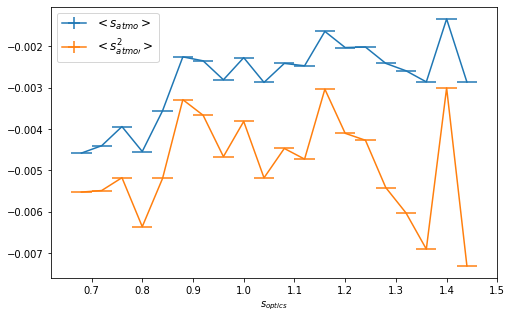

In [45]:
f,ax = plt.subplots(1,1,figsize=(8,5))

xval,yval,xerr,yerr = mkProfile(t['optics_size'],t['atmo_size'],xmin=0.5,xmax=1.5,ymin=-0.3,ymax=0.3,nx=25,retPlot=False)
xval2,yval2,xerr2,yerr2 = mkProfile(t['optics_size'],atmo_size_2,xmin=0.5,xmax=1.5,ymin=-0.5,ymax=0.5,nx=25,retPlot=False)

profile = ax.errorbar(xval,yval,xerr=xerr,yerr=yerr,label='$<s_{atmo}>$')
profile = ax.errorbar(xval2,yval2,xerr=xerr2,yerr=yerr2,label='$<s^2_{atmo\prime}>$')
ax.legend(fontsize="large")   
ax.set_xlabel("$s_{optics}$")

In [49]:
# use sign(atmo_size_2)*sqrt(atmo_size_2)
s_sqrt_atmo_size_2 = np.sign(atmo_size_2)*np.sqrt(np.abs(atmo_size_2))
print(s_sqrt_atmo_size_2)

[-0.26349946 -0.23015434 -0.2102689  ...  0.22031212 -0.27099249
  0.20103499]


Text(0.5, 0, '$s_{optics}$')

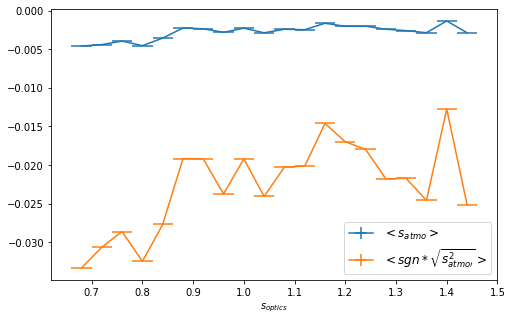

In [50]:
f,ax = plt.subplots(1,1,figsize=(8,5))

xval,yval,xerr,yerr = mkProfile(t['optics_size'],t['atmo_size'],xmin=0.5,xmax=1.5,ymin=-0.3,ymax=0.3,nx=25,retPlot=False)
xval2,yval2,xerr2,yerr2 = mkProfile(t['optics_size'],s_sqrt_atmo_size_2,xmin=0.5,xmax=1.5,ymin=-0.5,ymax=0.5,nx=25,retPlot=False)

profile = ax.errorbar(xval,yval,xerr=xerr,yerr=yerr*np.sqrt(2.*np.abs(yval)),label='$<s_{atmo}>$')
profile = ax.errorbar(xval2,yval2,xerr=xerr2,yerr=yerr2,label='$<sgn*\sqrt{s^2_{atmo\prime}}>$')
ax.legend(fontsize="large")   
ax.set_xlabel("$s_{optics}$")

Unclear if $s^2_{atmo'}$ varies less than $s_{atmo}$, but note that both have significant jumps. The star statistics are ample, but the number of different images per bin is not.  

Also, why are the mean values so far from 0.0 ?

In [63]:
# look just at sensor S3, or #27, and N10 or 41
s3 = t['chipnum'] == 27.0
t_s3 = t[s3]
n10 = t['chipnum'] == 41.0
t_n10 = t[n10]

In [64]:
# make our new variable here
atmo_size_2_s3 = t_s3['atmo_size']*t_s3['atmo_size'] + 2.0*t_s3['optics_size']*t_s3['atmo_size']
atmo_size_2_n10 = t_n10['atmo_size']*t_n10['atmo_size'] + 2.0*t_n10['optics_size']*t_n10['atmo_size']

Text(0.5, 0, '$s_{optics}$')

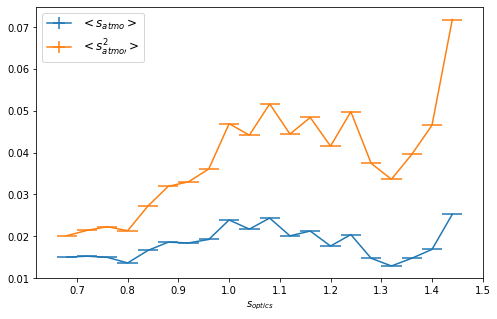

In [61]:
f,ax = plt.subplots(1,1,figsize=(8,5))

xval,yval,xerr,yerr = mkProfile(t_s3['optics_size'],t_s3['atmo_size'],xmin=0.5,xmax=1.5,ymin=-0.3,ymax=0.3,nx=25,retPlot=False)
xval2,yval2,xerr2,yerr2 = mkProfile(t_s3['optics_size'],atmo_size_2_s3,xmin=0.5,xmax=1.5,ymin=-0.5,ymax=0.5,nx=25,retPlot=False)

profile = ax.errorbar(xval,yval,xerr=xerr,yerr=yerr,label='$<s_{atmo}>$')
profile = ax.errorbar(xval2,yval2,xerr=xerr2,yerr=yerr2,label='$<s^2_{atmo\prime}>$')
ax.legend(fontsize="large")   
ax.set_xlabel("$s_{optics}$")

Text(0.5, 0, '$s_{optics}$')

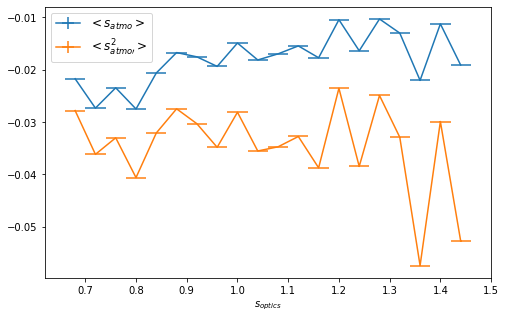

In [65]:
f,ax = plt.subplots(1,1,figsize=(8,5))

xval,yval,xerr,yerr = mkProfile(t_n10['optics_size'],t_n10['atmo_size'],xmin=0.5,xmax=1.5,ymin=-0.3,ymax=0.3,nx=25,retPlot=False)
xval2,yval2,xerr2,yerr2 = mkProfile(t_n10['optics_size'],atmo_size_2_n10,xmin=0.5,xmax=1.5,ymin=-0.5,ymax=0.5,nx=25,retPlot=False)

profile = ax.errorbar(xval,yval,xerr=xerr,yerr=yerr,label='$<s_{atmo}>$')
profile = ax.errorbar(xval2,yval2,xerr=xerr2,yerr=yerr2,label='$<s^2_{atmo\prime}>$')
ax.legend(fontsize="large")   
ax.set_xlabel("$s_{optics}$")